In [215]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path


# Default values
year = '2000'

def get_data(party):

    # Dictionary of state abbreviations
    states = pd.read_csv(Path().cwd() / 'data' / 'states.csv', delimiter=',')
    states_key = dict(zip(states.State, states.Abbreviation))
    info_file_path = f'./data/{year}/{party}_info.csv'
    df_info = pd.read_csv(info_file_path)
    
    # Load states
    dfs = []
    for s in states_key.values():
        data_file_path = f'./data/{year}/{party}_{s}.csv'
        if os.path.exists(data_file_path):
            # Load data into DataFrame
            state_d = pd.read_csv(data_file_path)
            state_d['state'] = s
            state_d['date'] = df_info.loc[df_info['state'] == s, 'date'].values[0]
            dfs.append(state_d)
    df = pd.concat(dfs, ignore_index=True)
    df.sort_values('date', ascending=True, inplace=True)
    df['cumulative_delegates'] = df.groupby('name')['delegates'].cumsum()

    return df


In [221]:
def plot(party, candidates):
    df = get_data(party)
    fig, ax = plt.subplots(figsize=(12, 6))
    ax2 = ax.twinx()
    for candidate, color in zip(candidates, colors):
        ax.scatter(df.loc[df['name'] == candidate, 'state'], df.loc[df['name'] == candidate, 'percentage'],
                   marker='o', linestyle='-', color=color, zorder=2)
    pivot_df = df.loc[df.name.isin(candidates)].pivot_table(index='state', columns='name', values='cumulative_delegates', sort=False)
    pivot_df.plot(kind='bar', stacked=True, ax=ax2, zorder=1, color=colors, alpha=.25)
    ax.set_xlabel('State Primary/Caucus')
    ax.set_ylabel('Percentage Vote Share')
    ax2.set_ylabel('Delegate count')
    
    plt.xticks(rotation=90)
    ax.set_ylim([0, 100])
    
    ax.set_title(f'Percentage Vote Share and Delegates Over Time')

    return fig


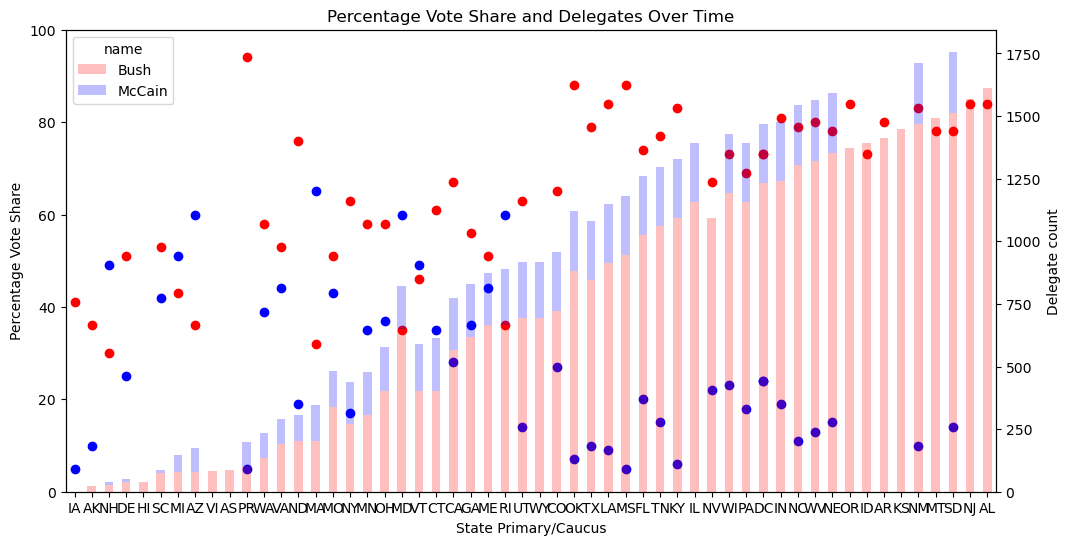

In [223]:
fig = plot('R', ['Bush', 'McCain'])

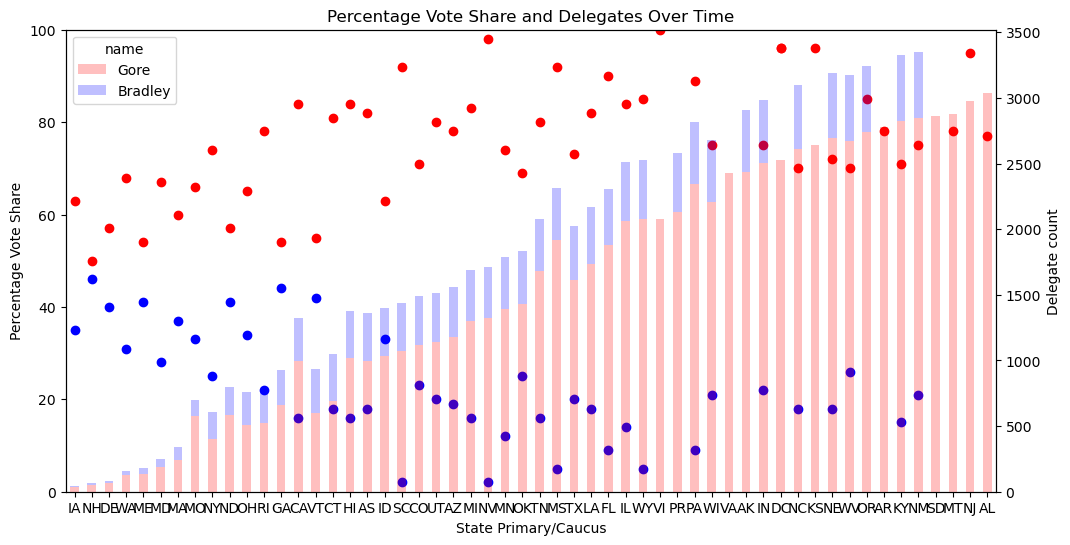

In [224]:
fig = plot('D', ['Gore', 'Bradley'])

In [163]:
delegates

[0]

In [71]:
p

84

In [37]:
candidate_data

,state,party,vote_share,other_name,name,r_date,d_date
322,NH,R,30.36,George W.,Bush,2000-02-01,2000-02-01
120,DE,R,50.73,George W.,Bush,2000-02-05,2000-02-05
121,DE,R,50.73,George W.,Bush,2000-02-08,NaN
438,SC,R,53.39,George W.,Bush,2000-02-19,NaN
227,MI,R,43.05,George W.,Bush,2000-02-22,2000-02-22
14,AZ,R,35.68,George W.,Bush,2000-02-22,2000-02-22
413,PR,R,94.20,George W.,Bush,2000-02-27,NaN
510,WA,R,57.83,George W.,Bush,2000-02-29,2000-02-29
497,VA,R,52.79,George W.,Bush,2000-02-29,NaN
218,MA,R,31.78,George W.,Bush,2000-03-07,2000-03-07


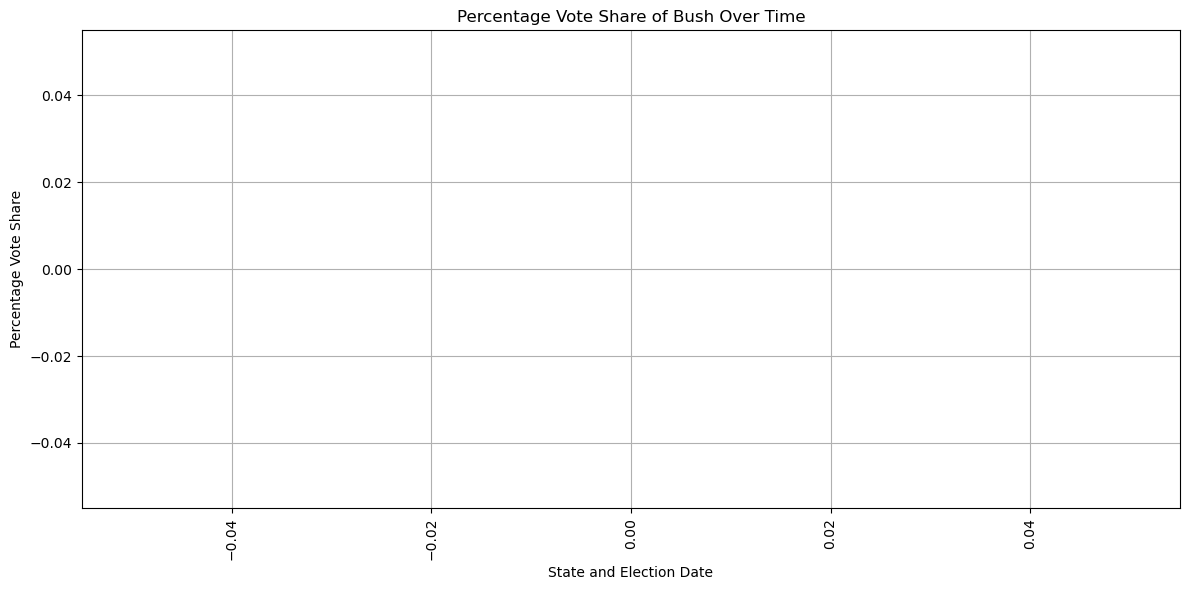

In [20]:
candidate_data = plot_results(2000)